In [1]:
import sys
sys.path.append("../src")

import generate_general_networks as generate
import torch
import matplotlib.pyplot as plt
import json
import numpy as np
import tikzplotlib

In [2]:
# Load results from optimization
f = open("../optimization_results/general_optimization/two_two_junction.json")
results = json.load(f)
f.close()

In [3]:
# Collecting network configuration
network_file = results['network_file']
f = open("../"+network_file)
network_config = json.load(f)
f.close()

T = network_config['T']
N = network_config['N']
controls = network_config['control_points']

In [4]:
# Collecting the start and final parameters
start = results['parameters'][0]
opt = results['parameters'][-1]
objective_vals = results['objectives']
parameters = results['parameters']

In [5]:
# Create the networks
start_speeds = [[torch.tensor(start[i])] for i in range(4)]
opt_speeds = [[torch.tensor(opt[i])] for i in range(4)]

start_cycle = [torch.tensor(start[4]), torch.tensor(start[5])]
opt_cycle = [torch.tensor(opt[4]), torch.tensor(opt[5])]


start_network = generate.two_two_junction(T, N, start_speeds, controls, start_cycle, track_grad=False)
opt_network = generate.two_two_junction(T, N, opt_speeds, controls, opt_cycle, track_grad=False)

In [6]:
# Do the simulations
densities, _, lengths, delays, n_stops = start_network.solve_cons_law_counting()
opt_densities, _, opt_lengths, opt_delays, opt_n_stops = opt_network.solve_cons_law_counting()

Bus bus_1 reached bus stop 0 at time 29.928564071655273, should wait for 29.70793914794922 seconds
Bus bus_2 reached bus stop 0 at time 104.71446228027344, should wait for 29.55537223815918 seconds
Bus bus_1 reached bus stop 0 at time 25.057144165039062, should wait for 29.61396598815918 seconds
Bus bus_2 reached bus stop 0 at time 52.828590393066406, should wait for 29.598102569580078 seconds


In [7]:
# Converting from dict to lists
times = list(lengths[0].keys())
distance = list(lengths[0].values())
distance2 = list(lengths[1].values())


opt_times = list(opt_lengths[0].keys())
opt_distance = list(opt_lengths[0].values())
opt_distance2 = list(opt_lengths[1].values())

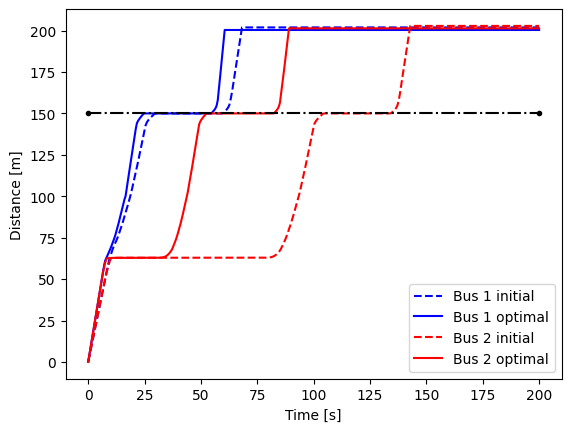

In [19]:
# Plotting distances

plt.plot(times, distance, '--b', label = "Bus 1 initial")
plt.plot(opt_times, opt_distance, 'b', label = "Bus 1 optimal")
plt.plot(times, distance2, '--r', label = "Bus 2 initial")
plt.plot(opt_times, opt_distance2, 'r', label = "Bus 2 optimal")

plt.plot([0, 200], [150, 150], '.-.k')
plt.ylabel("Distance [m]")
plt.xlabel("Time [s]")
plt.legend()

tikzplotlib.save("../figurer/two_two_dist_time.tex")


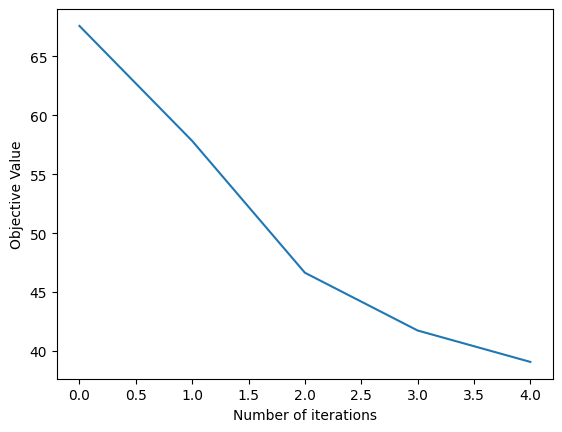

In [21]:
plt.plot([i for i in range(len(objective_vals)-1)], objective_vals[:-1])

plt.xlabel("Number of iterations")
plt.ylabel("Objective Value")
tikzplotlib.save("../figurer/two_two_conv.tex")